<a href="https://colab.research.google.com/github/Kaine-UCF/Artificial-Intelligence/blob/master/HW4/A_I_4_Finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. General Concepts

1a) Artificial intelligence is a broad term that is used to describe a computer program that does something smart. Within artificial intelligence, there are subfields such as machine learning and natural language processing, which can be broken down even further. Machine learning for example, is also composed of individual subfields such as deep learning and reinforcement learning. 

1b) According to the term's creator, Machine learning is a "field of study that gives computers the abilit to learn without being explicitly programmed". In practice, machine learning is the process of training a peice of software (a model) to make useful predictions using a data set. This often takes the form of recognizing various patterns within massive datasets, and extrapolating that pattern out across new data to gain new insights. Machine learning problems are often categorized as being a binary "supervised" or "unsupervised" but in reality, the majority of machine learning problems will fall somewhere on a spectrum between supervised and unsupervised.

1c) Deep learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. In practice, this means constructing layers upon layers ond artificual nuerons, where each nueron takes in some input, multiplies by some weight function, and outputs 1 result which is then fed to the next nueron. 
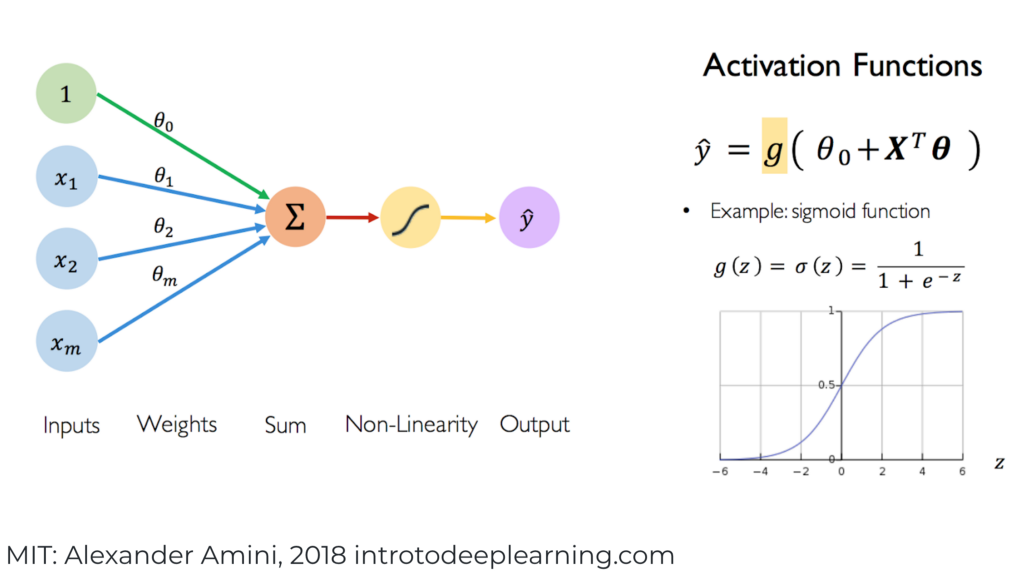

# 1.Building A Model

2a) A convolutional nuerel net (CNN) is one of the primary models used in machine learning and image/object recognition. Instead of preprocessing the data to derive features like textures and shapes, a CNN's input is just the images raw pixel data. It uses this data to extract features, and uses those features to "learn" what object or image its "looking" at.

2b) Specifically, A CNN consists of a number of convolutional and subsampling layers optionally followed by fully connected layers. The input to a convolutional layer is a m x m x r image where m is the height and width of the image and r is the number of channels, e.g. an RGB image has r=3. The convolutional layer will have k filters/kernels of size n x n x q where n is smaller than the dimension of the image and q can either be the same as the number of channels r or smaller and may vary for each kernel. The size of the filters gives rise to the locally connected structure which are each convolved with the image to produce k feature maps of size m−n+1. Each map is then subsampled with mean or max pooling over p x p contiguous regions where p ranges between 2 for small images (e.g. MNIST) Either before or after the subsampling layer an additive bias and sigmoidal nonlinearity is applied to each feature map. The figure below illustrates a full layer in a CNN consisting of convolutional and subsampling sublayers. Units of the same color have tied weights.

![alt text](http://ufldl.stanford.edu/tutorial/images/Cnn_layer.png)


2c) Although the general configuration of a Convolutional Neural Networt is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network, the exact configuration for any specific model requires experimentation with new structures and tweaking of all paramaters to achieve the highest success rate for the particular task at hand. 



Example architecture of a convnet to classify cats and dogs


In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) #Input layer
model.add(layers.MaxPooling2D(2, 2)) #MaxPool layer
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #Convolutional Layer
model.add(layers.MaxPooling2D(2, 2)) #MaxPool
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #Conv
model.add(layers.MaxPooling2D(2, 2)) #MaxPool
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #Conv
model.add(layers.MaxPooling2D(2, 2)) #MaxPool
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) #Relu to reduce nonlinearity 
model.add(layers.Dense(1, activation='sigmoid')) #sigmoid activation layer to reduce options

# 2. Comping A Model

**2a) Gradient Descent**
The use of Gradient descent arises from the need to find the minimum point of a convex problem. The minimum point is where the loss function converges, but calculating the loss fucntions for every concievable point is very inefficient. To solve this issue, gradient descent is used. It can be visualized by taking many tiny steps in each direction on a hill, and only moving forward if your step brings you to a lower position than your current one.

Specifically, the process of gradient descent begins by picking a random starting value. The algortiuthm then calculates the gradient of the loss curve at that point. The gradient always points in the direction of the steepest increase in the loss function, taking a step in the direction of the negative gradient that reduces the loss as quickly as possible. 

**2b) Learning Rate**
To determine their next point, gradient descent algorithms multipy the gradient by a scalar known as the learning rate (or step size). For example, if the gradient magitude is 2.5 and the learning rate is 0.01, then the algorithm will pick the next point 0.025 away from the previous point. 

**2c) Optimizers**
In general, optimzers are anything that improves the speed or accuracy of a model. Specifically, they tie together the loss function and model parameters by updating the model weights in response to the output of the loss function.
Optimzers can take many forms, but the most common are gradient descent (and all its variations), and regularization (ex: dropout).


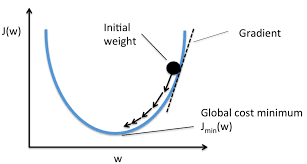

Example of a gradient descent algorithm call with a learning rate of 1.0

In [0]:
def f(x):
    return 2.0 * (x - 2.0)**2

def f_prime(x):
    return 4.0 * (x - 2.0)
    
GD = GradientDescent(f, f_prime, lr=1.0, x_init=0.0, a_init=0.0, b_init=4.0)

# 3. Training A Model

**3a) Underfitting**
Underfitting is what occurs when a model cannot capture the underlying trend of the data. This usually occurs because the dataset was to small, or the model was not complex enough. Signs of underfitting include low accuracy and high loss. 

**3b) Overfitting**
Overfitting is what occurs when the pattern that the model learns is to specific to the training data and cannot be generized to new data. This usually occurs because the given training data doesnt have enough variety, or the moddle is to complex. A major indicator of overfitting is if the training accuracy is very high while the testing accuracy is very low. 


**3c) Dropout**
Dropout is an optimization technique that can be applied to fight overfitting. With dropout implemented in a model, during training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer.

![alt text](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

**Underfitting model for cifar**

In [0]:
'''
Despite this, the models low overall accuracy(~31%), illustrates that it is underfitting.
'''
underfitModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Overfitting model for cifar dataset**

In [0]:
'''
This model is overfitting. Its weights are optimized for recognizing tranining data (accuracy ~79%),
but fail to get the same results for the testing data (accuracy ~50%).
'''
overFitModel = keras.Sequential([
    keras.layers.Conv2D(3,3),
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. Finetuning a pretrained model

**4a) What is finetuning?**

Fine-tuning a network means to tweak the parameters of an already trained network so that it adapts to the new task at hand. The initial layers learn very general features and as we go higher up the network, the layers tend to learn patterns more specific to the task it is being trained on. Thus, for fine-tuning, we want to keep the initial layers intact ( or freeze them ) and retrain the later layers for our task.

**4b) How to finetune?**

There are many way to fine tune, but in general the process takes 3 forms. 
1.  Truncate the last layer (softmax layer) of the pre-trained network and replace it with our new softmax layer that are relevant to our specific problem. For example, the pre-trained ImageNet network comes with a softmax layer that has 1000 categories. If our task is a classification on 10 categories, the new softmax layer of the network will be of 10 categories instead of 1000 categories. An example of this was removing the civilian class and reducing the softmax layer from 10 to 9 in HW #3

2. Use a smaller learning rate to train the network. Since the pretrained weights are already relatively good (certainly better than starting over at random), we do not want to distort them too quickly and too much. A common practice is to make the initial learning rate 10 times smaller than the one used for scratch training.

3. Freeze the weights of the first few layers of the pre-trained network. This is because the first few layers capture universal features like curves and edges that are also relevant to our new problem. We want to keep those weights intact and focus on learning the dataset specific high level features. 
